## Final Project
Harsh Karia <br>
GitHub Username: harshkaria <br>
USC ID: 5860082592

In [67]:
pip install tensorflow

     |████████████████████████████████| 228.5 MB 88 kB/s s eta 0:00:01
     |████████████████████████████████| 1.6 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 30.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 5.7 MB/s eta 0:00:011
     |████████████████████████████████| 123 kB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 438 kB/s eta 0:00:01
     |████████████████████████████████| 781 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 25.6 MB/s eta 0:00:01
Failed to build termcolor
    Running setup.py install for termcolor ... done
  DEPRECATION: termcolor was i

In [251]:
import os
import pandas as pd
import re
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LSTM

In [252]:
# Data Preprocessing

# Grab all text and data
pos_sents = []
neg_sents = []
pos_sen_len = []
pos_words = []
neg_sen_len = []
neg_words = []
all_words = []
all_sents = []
all_sen_len = []
def get_train_and_test_data_pos_cleaned():
    for root, dirs, files in os.walk('../data/pos'):
        for file in files:
            with open('../data/pos/' + file) as f:
                text = f.read().lower()
                repl = re.sub(r'\n', '', text)
                repl = re.sub(r'[^a-zA-Z\s]', '', repl)
                words = re.split(" +", repl)
                pos_sen_len.append(len(words))
                pos_words.extend(words)
                pos_sents.append(repl)
def get_train_and_test_data_neg_cleaned():
    for root, dirs, files in os.walk('../data/neg'):
        for file in files:
            with open('../data/neg/' + file) as f:
                text = f.read().lower()
                repl = re.sub(r'\n', '', text)
                repl = re.sub(r'[^a-zA-Z\s]', '', repl)
                words = re.split(" +", repl)
                neg_sen_len.append(len(words))
                neg_words.extend(words)
                neg_sents.append(repl)
    

get_train_and_test_data_pos_cleaned()
get_train_and_test_data_neg_cleaned()


In [253]:
all_words = pos_words
all_words.extend(neg_words)

all_sents = pos_sents
all_sents.extend(neg_sents)

all_sen_len = pos_sen_len
all_sen_len.extend(neg_sen_len)

In [254]:
print(f'Number of unique words: {len(set(all_words))}')

Number of unique words: 46788


In [255]:
summary_data = {
                'Attributes':  ['Average Review Length', 'Standard Deviation of Review Length'],
                'Values': [np.mean(all_sen_len), np.std(all_sen_len)]
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Attributes')

,Values
Attributes,
Average Review Length,645.417500
Standard Deviation of Review Length,284.985286


(array([  2.,   2.,   9.,  30.,  66.,  88.,  81., 131., 166., 179., 171.,
        154., 162., 146., 119., 102.,  83.,  62.,  41.,  30.,  22.,  30.,
         32.,  11.,  15.,  11.,  11.,   8.,   7.,   4.,   6.,   2.,   3.,
          3.,   4.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   1.]),
 array([  17.        ,   68.02173913,  119.04347826,  170.06521739,
         221.08695652,  272.10869565,  323.13043478,  374.15217391,
         425.17391304,  476.19565217,  527.2173913 ,  578.23913043,
         629.26086957,  680.2826087 ,  731.30434783,  782.32608696,
         833.34782609,  884.36956522,  935.39130435,  986.41304348,
        1037.43478261, 1088.45652174, 1139.47826087, 1190.5       ,
        1241.52173913, 1292.54347826, 1343.56521739, 1394.58695652,
        1445.60869565, 1496.63043478, 1547.65217391, 1598.67391304,
        1649.69565217, 1700.7173913 , 1751.73913043, 1802.76086957,
        1853.7826087 , 1904.80434783, 1955.82608696, 2006.84782609,
  

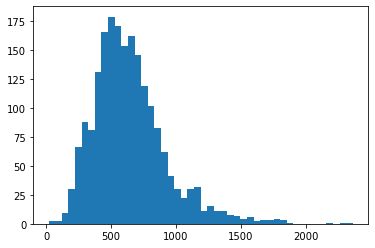

In [256]:
plt.hist(all_sen_len, bins='auto')

In [257]:
# Tokenizer
tokenizer = Tokenizer(num_words=5001)
tokenizer.fit_on_texts(all_sents)
print("Word Counts: ", tokenizer.word_counts) # a dictionary of words and their counts
print("Document Count: ", str(tokenizer.document_count)) # an integer count of the total number of documents used to fit the Tokenizer
print("Word Index: ", str(tokenizer.word_index)) # a dictionary of words and their uniquely assigned integers
print("Word Docs: ", str(tokenizer.word_docs)) # a dictionary of words and how many documents each appeared in
print("Vocab Size: ", len(tokenizer.word_index)+1)

Word Counts:  OrderedDict([('assume', 50), ('nothing', 800), ('the', 76327), ('phrase', 27), ('is', 25179), ('perhaps', 458), ('one', 5521), ('of', 33971), ('most', 2300), ('used', 364), ('s', 1088), ('as', 11343), ('first', 1768), ('impressions', 6), ('and', 35351), ('rumors', 17), ('are', 6945), ('hardly', 119), ('ever', 737), ('what', 3078), ('they', 4279), ('seem', 574), ('to', 31763), ('be', 6082), ('especially', 454), ('goes', 646), ('for', 9914), ('oscar', 210), ('novak', 6), ('an', 5736), ('architect', 10), ('who', 5378), ('main', 399), ('focus', 148), ('three', 628), ('tango', 25), ('a', 37964), ('delightful', 56), ('funny', 829), ('romantic', 244), ('comedy', 800), ('about', 3518), ('assumptions', 4), ('being', 1336), ('yourself', 119), ('matthew', 113), ('perry', 27), ('shy', 31), ('clumsy', 32), ('chicago', 56), ('based', 370), ('along', 529), ('with', 10779), ('openly', 14), ('gay', 105), ('partner', 112), ('peter', 253), ('steinberg', 2), ('oliver', 70), ('platt', 31), ('

In [258]:
L = int(np.percentile(all_sen_len, 70))

In [259]:
print(f'70% of reviews are shorter than {L}')

70% of reviews are shorter than 738


In [270]:
train_pos_sent = pos_sents[:700]
test_pos_sent = pos_sents[700:1000]
print(len(test_pos_sent))

train_neg_sent = neg_sents[:700]
# Error
test_neg_sent = neg_sents[700:1000]

300


In [271]:
all_train_seq = {}
idx = 0
for sent in train_pos_sent:
    seqd = tokenizer.texts_to_sequences([sent])
    all_train_seq[idx] = {
        "sent": sent,
        "class": 1,
        "tkn_seq": seqd,
        "padded_seq": sequence.pad_sequences(seqd, maxlen=L)
    }
    idx += 1
for sent in train_neg_sent:
    seqd = tokenizer.texts_to_sequences([sent])
    all_train_seq[idx] = {
        "sent": sent,
        "class": -1,
        "tkn_seq": seqd,
        "padded_seq": sequence.pad_sequences(seqd, maxlen=L)
    }
    idx += 1

In [272]:
all_test_seq = {}
idx = 0
for sent in test_pos_sent:
    seqd = tokenizer.texts_to_sequences([sent])
    all_test_seq[idx] = {
        "sent": sent,
        "class": 1,
        "tkn_seq": seqd,
        "padded_seq": sequence.pad_sequences(seqd, maxlen=L)
    }
    idx += 1
for sent in test_neg_sent:
    seqd = tokenizer.texts_to_sequences([sent])
    all_test_seq[idx] = {
        "sent": sent,
        "class": -1,
        "tkn_seq": seqd,
        "padded_seq": sequence.pad_sequences(seqd, maxlen=L)
    }
    idx += 1
print(len(test_pos_sent))

300


### 2c - word embeddings

ref: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [273]:
model = Sequential()
model.add(Embedding(5001, 32, input_length=L))
model.add(Flatten())

In [274]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [275]:
model.summary()

Model: "sequential_231"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_231 (Embedding)   (None, 738, 32)           160032    
                                                                 
 flatten_168 (Flatten)       (None, 23616)             0         
                                                                 
Total params: 160,032
Trainable params: 160,032
Non-trainable params: 0
_________________________________________________________________


In [276]:
padded_seqs = []
classes = []

for idx in all_train_seq.keys():
    padded_seqs.append(all_train_seq[idx]['padded_seq'][0])
    classes.append(all_train_seq[idx]['class'])

In [277]:
training_padded = np.array(padded_seqs)
training_labels = np.array(classes)
model.fit(training_padded, training_labels, epochs=2, batch_size=10, verbose=0)

In [278]:
model.predict(training_padded, batch_size=10)

140/140 [==============================] - 0s 1ms/step


array([[-0.02168051, -0.00758807, -0.01658459, ...,  0.04371518,
        -0.01158848, -0.04063194],
       [-0.02168051, -0.00758807, -0.01658459, ..., -0.00790124,
        -0.04140791, -0.00040355],
       [-0.04102661, -0.02045552, -0.01355471, ..., -0.01380288,
        -0.01743758, -0.02792305],
       ...,
       [-0.02168051, -0.00758807, -0.01658459, ..., -0.0062037 ,
        -0.01518016, -0.01748896],
       [-0.02168051, -0.00758807, -0.01658459, ..., -0.03221392,
        -0.00420987, -0.0100298 ],
       [-0.02168051, -0.00758807, -0.01658459, ..., -0.00626045,
        -0.01600646, -0.00733727]], dtype=float32)

In [279]:
padded_seqs = []

for idx in all_test_seq.keys():
    padded_seqs.append(all_test_seq[idx]['padded_seq'][0])


In [280]:
test_padded = np.array(padded_seqs)
model.predict(test_padded, batch_size=10)

60/60 [==============================] - 0s 1ms/step


array([[-0.02168051, -0.00758807, -0.01658459, ...,  0.04058713,
        -0.01281116, -0.00417403],
       [-0.04472454, -0.00639432, -0.01203178, ...,  0.0015641 ,
         0.00997971,  0.00403818],
       [-0.02168051, -0.00758807, -0.01658459, ..., -0.03897642,
         0.05576789, -0.03214334],
       ...,
       [-0.02168051, -0.00758807, -0.01658459, ..., -0.0359923 ,
        -0.0427846 , -0.00970767],
       [-0.02168051, -0.00758807, -0.01658459, ...,  0.01365588,
         0.02648075, -0.01571001],
       [-0.02168051, -0.00758807, -0.01658459, ...,  0.0307848 ,
         0.04624581,  0.03666265]], dtype=float32)

### Multi layer percepton

In [281]:
training_padded_seqs = []
training_classes = []

for idx in all_train_seq.keys():
    training_padded_seqs.append(all_train_seq[idx]['padded_seq'][0])
    if all_train_seq[idx]['class'] == -1:
        training_classes.append(0)
    else:
        training_classes.append(1)

In [282]:
test_padded_seqs = []
test_classes = []

for idx in all_test_seq.keys():
    test_padded_seqs.append(all_test_seq[idx]['padded_seq'][0])
    if all_test_seq[idx]['class'] == -1:
        test_classes.append(0)
    else:
        test_classes.append(1)

In [283]:
training_padded = np.array(training_padded_seqs)
training_labels = np.array(training_classes)

test_padded = np.array(test_padded_seqs)
test_labels = np.array(test_classes)

In [284]:
model = Sequential()
model.add(Embedding(5001, 32, input_length=L))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [285]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [286]:
model.summary()

Model: "sequential_232"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_232 (Embedding)   (None, 738, 32)           160032    
                                                                 
 flatten_169 (Flatten)       (None, 23616)             0         
                                                                 
 dense_774 (Dense)           (None, 50)                1180850   
                                                                 
 dropout_549 (Dropout)       (None, 50)                0         
                                                                 
 dense_775 (Dense)           (None, 50)                2550      
                                                                 
 dropout_550 (Dropout)       (None, 50)                0         
                                                                 
 dense_776 (Dense)           (None, 50)             

In [287]:
iterations = 30

train_accuracies = []
test_accuracies = []
for i in range(iterations):
    model = Sequential()
    model.add(Embedding(5001, 32, input_length=L))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(training_padded, training_labels, epochs=2, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(training_padded, training_labels, verbose=0)
    train_accuracies.append(accuracy*100)
    loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)
    test_accuracies.append(accuracy*100)

In [289]:
summary_data = {
                'Parameters':  ['Train Accuracy', 'Test Accuracy'],
                'Values': [f'{round(np.mean(train_accuracies), 2)}%', f'{round(np.mean(test_accuracies),2)}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameters')

,Values
Parameters,
Train Accuracy,86.61%
Test Accuracy,64.21%


### 1D CNN

In [290]:
train_accuracies = []
test_accuracies = []
for i in range(10):
    model = Sequential()
    model.add(Embedding(5001, 32, input_length=L))
    model.add(Conv1D(filters=32, kernel_size=3))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(training_padded, training_labels, epochs=2, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(training_padded, training_labels, verbose=0)
    train_accuracies.append(accuracy*100)
    loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)
    test_accuracies.append(accuracy*100)

In [291]:
summary_data = {
                'Parameters':  ['Train Accuracy', 'Test Accuracy'],
                'Values': [f'{round(np.mean(train_accuracies), 2)}%', f'{round(np.mean(test_accuracies),2)}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameters')

,Values
Parameters,
Train Accuracy,71.7%
Test Accuracy,58.85%


#### LSTM

In [205]:
epoch_accuracies = {}
for epoch in range(10, 51):
    print(epoch)
    train_accuracies = []
    test_accuracies = []
    model = Sequential()
    model.add(Embedding(5001, 32, input_length=L))
    model.add(LSTM(32, dropout=0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(training_padded, training_labels, epochs=epoch, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(training_padded, training_labels, verbose=0)
    train_accuracies.append(accuracy*100)
    loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)
    test_accuracies.append(accuracy*100)
    epoch_accuracies[epoch] = {
        'train_accuracy': np.mean(train_accuracies),
        'test_accuracy': np.mean(test_accuracies),
    }

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [212]:
pd.DataFrame.from_dict(epoch_accuracies, orient='index')

,train_accuracy,test_accuracy
10,100.000000,32.875001
11,100.000000,32.687500
12,100.000000,32.749999
13,100.000000,32.875001
14,100.000000,32.624999
15,94.785714,39.312500
16,100.000000,33.312500
17,100.000000,32.749999
18,100.000000,32.499999
19,100.000000,32.749999


#### Results:

In [214]:
summary_data = {
                'Parameters':  ['Epoch', 'Train Accuracy', 'Test Accuracy'],
                'Values': ['15', '94.785714%', '39.312500%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameters')

,Values
Parameters,
Epoch,15
Train Accuracy,94.785714%
Test Accuracy,39.312500%


# Notes and Addendums:

***General Note: I fit the negative test data on 700-1000 and train on all of the data, the test accuracy may have increased if I increased the test data but I ran out of time to retrain and submit on time :( (see ctrl + f for `test_neg_sent = neg_sents[700:] and pos_sents[700:]` - didn't know it would cause a class imabalance -- so the LSTM model oculd be3 better)